<a href="https://colab.research.google.com/github/Dealer2112/trabajofinal2/blob/main/Trabajo_final_coderhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset de Excel
df = pd.read_excel('/content/Trabajo final coder.xlsx')


In [ ]:
# 1. Abstracto con Motivación y Audiencia

## Motivación
#Optimizar el flujo de trabajo en la gestión de cuentas es crucial para mejorar la eficiencia y reducir los tiempos de ciclo. Utilizando un dataset que incluye información sobre tiempos de ciclo, reasignaciones y participación de agentes, se busca identificar patrones y factores que afectan el flujo de trabajo para implementar mejoras efectivas.

## Objetivo
#Aplicar técnicas de Machine Learning para analizar y mejorar el flujo de trabajo en la gestión de cuentas, enfocándose en los tiempos de ciclo, la frecuencia de reasignaciones y la participación de agentes. El objetivo es optimizar los procesos para aumentar la eficiencia y eficacia en la gestión de cuentas.

## Posibles Problemas Identificados
# Sobrecarga de Trabajo: ¿Los gestores con alto volumen de cuentas están experimentando demoras significativas debido a su carga de trabajo?
# Condiciones Locales: ¿Existen problemas específicos en regiones con pocas cuentas asignadas pero altas demoras?

In [2]:
#2. Resumen de Análisis del DataFrame
#2.1 Resumen de información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   fec_activacion                  1036 non-null   datetime64[ns]
 1   id_externo_cliente              1036 non-null   object        
 2   id_cuenta                       1036 non-null   int64         
 3   id_cliente                      1036 non-null   int64         
 4   id_acreditado                   1036 non-null   int64         
 5   id_acreditado_cuenta_domicilio  1036 non-null   int64         
 6   id_estado                       1036 non-null   int64         
 7   id_municipio                    1036 non-null   int64         
 8   fec_asignacion                  1036 non-null   datetime64[ns]
 9   fec_apartado                    1036 non-null   datetime64[ns]
 10  id_agente_apartado              1036 non-null   int64         
 11  id_a

In [3]:
#2.2 Dimensiones del DataFrame
df.shape

(1036, 15)

In [4]:
#2.3 # Crear una nueva columna 'nuevo_id' que contenga un índice único para cada fila
df['nuevo_id'] = range(1, len(df) + 1)

# Verificar las primeras filas para asegurarnos de que se creó correctamente
print(df[['nuevo_id', 'id_externo_cliente', 'fec_asignacion']].head(10))



   nuevo_id id_externo_cliente      fec_asignacion
0         1              61858 2024-04-29 22:20:28
1         2              45091 2024-05-21 19:24:29
2         3              33846 2023-02-24 19:12:07
3         4              53345 2024-01-22 08:23:09
4         5              54816 2023-10-17 18:00:41
5         6              43450 2023-04-26 15:21:52
6         7              55101 2024-02-22 17:32:52
7         8              54521 2023-04-18 17:30:10
8         9              41252 2023-05-15 17:17:05
9        10              41153 2023-04-21 14:45:09


In [ ]:
#2.4 Descripción de las variables en el conjunto de datos:
# id_cuenta: Identificador único de la cuenta.
# id_domicilio: Identificador único del domicilio.
# fec_activacion: Momento en que la cuenta se carga en el sistema.
# fec_asignacion: Momento en que la cuenta se asigna a un agente o recurso.
# fec_apartado: Momento en que el agente aparta el domicilio para la visita.
# fec_visita: Momento en que se realiza la visita.
# id_externo_cliente: Identificador externo del cliente.
# id_cliente: Identificador del cliente asociado a la cuenta.
# id_acreditado: Identificador del acreditado.
# id_acreditado_cuenta_domicilio: Identificador único que relaciona al acreditado, cuenta y domicilio.
# id_estado: Identificador del estado (ubicación geográfica).
# id_municipio: Identificador del municipio (ubicación geográfica).
# id_agente_asignado: Identificador del agente asignado.
# id_agente_apartado: Identificador del agente que aparta el domicilio para visita.
# id_agente: Identificador del agente responsable de la visita.
# id_visita: Identificador de la visita.
# fec_finalizada: Fecha en que se finalizó la gestión de la cuenta.
##Opiones de columnas.
## fec_finalizada ajustada:Fecha en que se finalizó la gestión de la cuenta (se ajustaron datos).



In [5]:
#2.5 Identificación de Celdas Vacías
# Mostrar el número de valores nulos en cada columna
print("Número de valores nulos por columna:")
print(df.isnull().sum())

Número de valores nulos por columna:
fec_activacion                    0
id_externo_cliente                0
id_cuenta                         0
id_cliente                        0
id_acreditado                     0
id_acreditado_cuenta_domicilio    0
id_estado                         0
id_municipio                      0
fec_asignacion                    0
fec_apartado                      0
id_agente_apartado                0
id_agente                         0
id_visita                         0
fec_finalizada                    0
fec_finalizada ajustada           0
nuevo_id                          0
dtype: int64


In [ ]:
# Resumen de manejo de celdas vacías en el dataset

# 1. id_agente
# Celdas vacías: 487
# Manejo: Se asignó el valor "Sin agente asignado" a las celdas vacías donde
#         id_visita tenía la etiqueta "Sin visita y sin finalización".

# 2. id_agente_apartado
# Celdas vacías: 453
# Manejo: Se asignó el valor "Sin agente apartado" a las celdas vacías en
#         cuentas que tenían etiquetas similares.

# 3. fec_apartado
# Celdas vacías: 487
# Manejo: Se decidieron mantener las celdas vacías, ya que no hubo apartado ni asignación.

# 4. fec_finalizada
# Celdas vacías: 487
# Manejo: Se mantendrán las celdas vacías, reflejando la ausencia de finalización
#         en cuentas sin asignación ni visita.

# 5. fec_asignacion
# Celdas vacías: 933 (415 con etiqueta "Sin visita y sin finalización")
# Manejo:
#   - Las 415 celdas con la etiqueta se mantendrán vacías.
#   - Para las 530 celdas vacías que tienen fecha en fec_apartado,
#     se imputará fec_asignacion con los valores de fec_apartado.


In [ ]:
#3. Análisis de Razones de Demora en las Cuentas

#Si el tiempo de demora comienza a contar desde que el gestor aparta la cuenta, entonces debemos ajustar el análisis para que refleje ese criterio. Aquí está el plan actualizado:

#Paso 1: Definir el Criterio de Demora
#Establecer el umbral de 3 días: Las cuentas que excedan este plazo desde la fecha de apartado hasta la fecha de finalización se considerarán demoradas.
#Paso 2: Verificar la Estructura del DataFrame.
#Paso 3 Calcular la Demora.
#Paso 4 Estadísticas Descriptivas.
#Paso 5 Identificación de Cuentas con Mayor Demora.
#Paso 6 Análisis por Gestor.
#Paso 7 Identificación de Gestores con Mayor Demora.
#Paso 8 Agrupar los datos por 'id_agente' para obtener el volumen de cuentas y la demora promedio.
#Paso 9 Obtener la Cantidad de Cuentas Asignadas por Gestor.
#Paso 10 Obtener la Distribución por Estado.
#Paso 11. Gestores con más visitas y sus tiempos promedio de demora.

In [6]:
#Paso 2. Verificar la Estructura del DataFrame: Primero, asegúrate de que la columna fec_finalizada ajustada esté en el formato de fecha correcto. Si es un objeto datetime64[ns], puedes proceder.
print(df['fec_finalizada ajustada'].dtypes)


datetime64[ns]


In [7]:
#Paso 3 Calcular la Demora: Utiliza la columna ajustada para calcular la nueva columna de demora:
df['demora'] = (df['fec_finalizada ajustada'] - df['fec_apartado']).dt.total_seconds() / 3600  # en horas


In [8]:
#Paso 4 Estadísticas Descriptivas:
print("\nEstadísticas de demora:")
print(df['demora'].describe())



Estadísticas de demora:
count    1036.000000
mean       31.541475
std        21.315467
min         0.010556
25%        11.168264
50%        31.107361
75%        54.396944
max        71.823889
Name: demora, dtype: float64


In [ ]:
##Explicación:
#Count: 1036 cuentas tienen datos válidos. Esto indica que estamos analizando 1036 cuentas donde se registró la demora correctamente.

#Mean: 31.54 horas es el tiempo promedio de demora. En promedio, las cuentas tardan poco más de un día y medio en ser finalizadas después de ser apartadas por los gestores.

#Std: 21.32 horas es la desviación estándar. Esto nos dice que los tiempos de demora varían bastante entre las cuentas. Algunas se resuelven muy rápido, mientras que otras toman mucho más tiempo.

#Min: 0.01 horas es la demora mínima. Hay cuentas que fueron finalizadas casi inmediatamente después de haber sido apartadas.

#25% (Primer cuartil): 11.17 horas. El 25% de las cuentas más rápidas tardaron menos de 11.17 horas en ser finalizadas.

#50% (Mediana): 31.11 horas. La mitad de las cuentas se finalizaron en menos de 31.11 horas, lo que está cerca del promedio.

#75% (Tercer cuartil): 54.40 horas. El 75% de las cuentas tardan menos de 54.40 horas en ser finalizadas, pero el 25% restante toma más tiempo.

#Max: 71.82 horas es el tiempo máximo de demora. Algunas cuentas pueden tardar hasta tres días en ser finalizadas.


In [9]:
#Paso 5 Identificación de Cuentas con Mayor Demora:
#Puedes investigar las cuentas que tardaron más (por ejemplo, las que tienen demoras superiores a la media) para entender por qué se están demorando. Esto podría incluir revisiones de su estado, gestor asignado, o cualquier otra variable relevante.
cuentas_largas_demoras = df[df['demora'] > df['demora'].mean()]
print("Cuentas con demoras mayores a la media:")
print(cuentas_largas_demoras[['fec_apartado', 'fec_finalizada ajustada', 'demora']])

Cuentas con demoras mayores a la media:
            fec_apartado fec_finalizada ajustada     demora
531  2023-07-07 16:22:21              2023-07-09  31.627500
532  2024-05-30 16:19:19              2024-06-01  31.678056
533  2023-08-11 16:16:55              2023-08-13  31.718056
534  2024-07-22 16:05:13              2024-07-24  31.913056
535  2024-02-13 16:03:33              2024-02-15  31.940833
...                  ...                     ...        ...
1031 2024-01-18 00:51:51              2024-01-21  71.135833
1032 2023-07-14 00:27:43              2023-07-17  71.538056
1033 2023-07-14 00:27:17              2023-07-17  71.545278
1034 2024-05-14 00:17:07              2024-05-17  71.714722
1035 2023-03-15 00:10:34              2023-03-18  71.823889

[505 rows x 3 columns]


In [ ]:
#Algunas cuentas superan apenas la media (alrededor de 31.5 horas), pero hay otras que toman muchísimo más tiempo (alrededor de 71 horas), lo que podría indicar problemas de eficiencia con ciertos casos o agentes. Los tiempos más largos merecen una revisión para entender las razones de esas demoras.

In [10]:
# Paso 6 Análisis por Gestor: Puedes segmentar la información por gestor para identificar si algunos gestores tienen un rendimiento mejor o peor en cuanto a la gestión del tiempo:
# Agrupa las cuentas demoradas por el id del agente (gestor)
demoras_por_gestor = cuentas_largas_demoras.groupby('id_agente')['demora'].mean().sort_values(ascending=False)
print("Tiempos de demora por gestor:")
print(demoras_por_gestor)


Tiempos de demora por gestor:
id_agente
9078    63.716111
9923    62.421389
8773    62.413611
7377    61.642778
9429    61.492778
          ...    
3725    35.026667
9686    33.316667
9718    33.151944
5196    32.583056
9590    32.273611
Name: demora, Length: 87, dtype: float64


In [ ]:
# Identificación de Gestores con Mayor Demora:
#Puedes enfocarte en los gestores con las mayores demoras y analizar las causas posibles (¿falta de visitas? ¿problemas en ciertas regiones?).
# Gestores con mayores demoras (mayores a la media)
gestores_mayores_demoras = cuentas_largas_demoras.groupby('id_agente')['demora'].mean().sort_values(ascending=False)
print("Gestores con mayores tiempos de demora:")
print(gestores_mayores_demoras.head(10))  # Ver los 10 gestores con más demora


Gestores con mayores tiempos de demora:
id_agente
9078    63.716111
9923    62.421389
8773    62.413611
7377    61.642778
9429    61.492778
9451    61.305833
6774    61.180611
3805    61.132778
7486    61.060139
1908    60.610556
Name: demora, dtype: float64


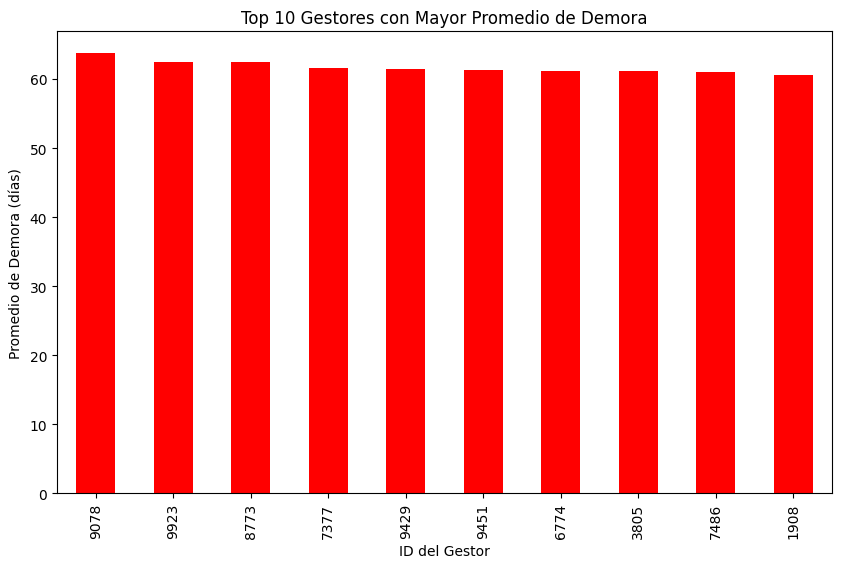

In [11]:
#Paso 7 Agrupar por gestor (id_agente) y calcular el promedio de demora
demoras_por_gestor = cuentas_largas_demoras.groupby('id_agente')['demora'].mean().sort_values(ascending=False)

# Seleccionar los 10 gestores con mayor promedio de demora
top_10_gestores = demoras_por_gestor.nlargest(10)

# Crear el gráfico de barras para los gestores con mayor promedio de demora
plt.figure(figsize=(10, 6))
top_10_gestores.plot(kind='bar', color='red')

# Añadir etiquetas y título
plt.title('Top 10 Gestores con Mayor Promedio de Demora')
plt.xlabel('ID del Gestor')
plt.ylabel('Promedio de Demora (días)')
plt.show()

In [12]:
# Paso 8 Agrupar los datos por 'id_agente' para obtener el volumen de cuentas y la demora promedio
summary = df.groupby('id_agente').agg(
    volumen=('id_externo_cliente', 'size'),  # Número de cuentas
    mean_demora=('demora', 'mean')           # Demora promedio
).reset_index()

# Verifica el resumen
print(summary)


     id_agente  volumen  mean_demora
0         1379       56    35.426027
1         1577        4    35.284722
2         1616       38    28.362844
3         1643        8    28.191319
4         1859        2    22.416806
..         ...      ...          ...
99        9820        6    41.107685
100       9865        3    34.340370
101       9923        1    62.421389
102       9955        5    17.463667
103       9985        1    13.753333

[104 rows x 3 columns]


In [13]:
#paso 9 Obtener la Cantidad de Cuentas Asignadas por Gestor: Puedes filtrar el DataFrame para contar cuántas cuentas están asignadas a cada uno de estos gestores.
# Lista de gestores con alta demora
gestores_alta_demora = [9078, 9923, 8773, 7377, 9429, 9451, 6774, 3805, 7486, 1908]

# Filtrar las cuentas asignadas a estos gestores
cuentas_gestores_alta_demora = df[df['id_agente'].isin(gestores_alta_demora)]

# Contar la cantidad de cuentas asignadas por gestor
cuentas_por_gestor = cuentas_gestores_alta_demora['id_agente'].value_counts()
print(cuentas_por_gestor)


id_agente
6774    15
7486     8
9078     5
9451     3
1908     1
3805     1
9429     1
7377     1
8773     1
9923     1
Name: count, dtype: int64


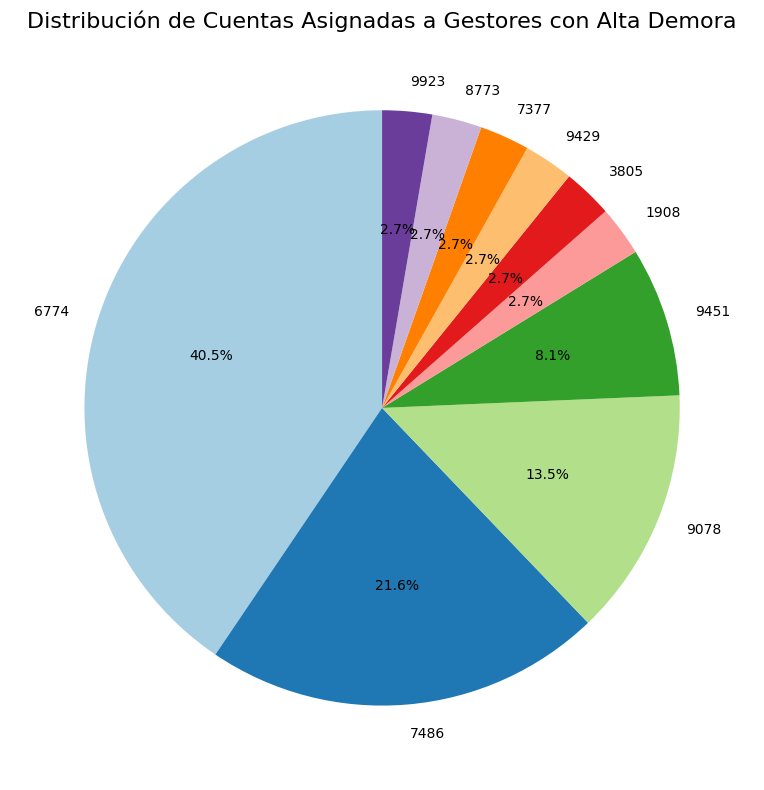

In [14]:
#Gráfico de Pastel: Cantidad de Cuentas Asignadas por Gestor
plt.figure(figsize=(8, 8))
cuentas_por_gestor.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribución de Cuentas Asignadas a Gestores con Alta Demora', fontsize=16)
plt.ylabel('')  # Eliminar la etiqueta del eje Y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [15]:
## Paso 10 Obtener la Distribución por Estado: También es importante ver en qué estados están asignadas las cuentas de cada gestor.
# Agrupar por estado y gestor
estados_por_gestor = cuentas_gestores_alta_demora.groupby(['id_agente', 'id_estado']).size().unstack(fill_value=0)
print(estados_por_gestor)


id_estado  10  11  14  19  21  25  26  30
id_agente                                
1908        0   0   0   0   0   0   0   1
3805        0   0   0   0   0   1   0   0
6774        0   0   0   0  15   0   0   0
7377        0   0   0   0   1   0   0   0
7486        0   0   8   0   0   0   0   0
8773        0   0   0   1   0   0   0   0
9078        0   5   0   0   0   0   0   0
9429        0   0   0   1   0   0   0   0
9451        0   0   0   0   0   0   3   0
9923        1   0   0   0   0   0   0   0


In [ ]:
#paso 11. Gestores con más visitas y sus tiempos promedio de demora.

In [16]:
# Calcular la cantidad de visitas por gestor
visitas_por_gestor = cuentas_largas_demoras.groupby('id_agente')['id_visita'].count()

# Calcular el promedio de tiempo de demora por gestor
promedio_demoras_por_gestor = cuentas_largas_demoras.groupby('id_agente')['demora'].mean()

# Combinar ambos resultados en un solo DataFrame
resultado_combined = pd.DataFrame({
    'cantidad_visitas': visitas_por_gestor,
    'promedio_demora': promedio_demoras_por_gestor
})

# Ordenar el DataFrame por cantidad de visitas (de mayor a menor)
resultado_combined = resultado_combined.sort_values(by='cantidad_visitas', ascending=False)

# Mostrar los 10 gestores con más visitas y sus tiempos de demora
print("Gestores con más visitas y sus tiempos promedio de demora:")
print(resultado_combined.head(10))



Gestores con más visitas y sus tiempos promedio de demora:
           cantidad_visitas  promedio_demora
id_agente                                   
3020                     41        47.529309
7990                     34        48.853832
4451                     32        51.050955
1379                     31        53.305296
4963                     28        48.669087
7635                     23        53.758720
5038                     21        57.190357
3755                     19        45.136433
1616                     16        49.268247
6387                     15        55.046259


In [ ]:
##Análisis de Resultados
#Distribución de Cuentas:

#Gestor 6774 tiene la mayor cantidad de cuentas (15). Esto puede indicar que está manejando una carga de trabajo significativa, lo que podría contribuir a sus altos tiempos de demora.
#Gestores como 7486 y 9078 también tienen un número razonable de cuentas (8 y 5 respectivamente), lo que sugiere que pueden estar en una situación similar.
#Los demás gestores (9451, 1908, 3805, 9429, 7377, 8773 y 9923) tienen una o muy pocas cuentas asignadas, lo que puede indicar que su carga de trabajo es menor.

#la hipótesis de que una sobrecarga de cuentas es la causa principal de demoras en la gestión de visitas no es respaldada por los datos. Los gestores con más cuentas asignadas no muestran tiempos de demora significativamente mayores, ya que sus tiempos promedio se mantienen por debajo de las 60 horas.

#Estrategias Potenciales:

#Reasignación de Cuentas: Considerar la posibilidad de redistribuir algunas cuentas de los gestores más ocupados a aquellos con menos cuentas asignadas.
#Capacitación y Soporte: Proporcionar capacitación adicional o apoyo a los gestores con mayor carga de trabajo para ayudarlos a gestionar mejor su tiempo y recursos.
#Monitoreo y Evaluación: Establecer un sistema de monitoreo para evaluar la carga de trabajo y el desempeño de cada gestor, lo que permitirá identificar rápidamente a aquellos que puedan necesitar apoyo.

In [ ]:
#Hipótesis derivadas:
#Falta de visitas como posible causa de demora: Gestores con pocas visitas podrían estar teniendo problemas para completar cuentas en tiempo, lo que sugiere que incrementar el número de visitas podría mejorar su eficiencia.


In [17]:
#Paso 12 Calcular la cantidad de visitas por gestor
visitas_por_gestor = cuentas_largas_demoras.groupby('id_agente')['id_visita'].count()

# Calcular el promedio de tiempo de demora por gestor
promedio_demoras_por_gestor = cuentas_largas_demoras.groupby('id_agente')['demora'].mean()

# Combinar ambos resultados en un solo DataFrame
resultado_combined = pd.DataFrame({
    'cantidad_visitas': visitas_por_gestor,
    'promedio_demora': promedio_demoras_por_gestor
})

# Ordenar el DataFrame por cantidad de visitas (de menor a mayor)
resultado_combined = resultado_combined.sort_values(by='cantidad_visitas', ascending=True)

# Mostrar los 10 gestores con menos visitas y sus tiempos de demora
print("Gestores con menos visitas y sus tiempos promedio de demora:")
print(resultado_combined.head(10))

Gestores con menos visitas y sus tiempos promedio de demora:
           cantidad_visitas  promedio_demora
id_agente                                   
9955                      1        35.553333
8446                      1        50.628056
7448                      1        58.014444
7422                      1        59.106944
7377                      1        61.642778
6797                      1        37.468056
8773                      1        62.413611
8902                      1        47.631667
6306                      1        50.961667
8914                      1        55.758333


In [ ]:
#Hipótesis:
#La falta de visitas podría estar afectando la eficiencia de los gestores. En otras palabras, los gestores que realizan menos visitas tienen mayores tiempos de demora, lo que sugiere que aumentar el número de visitas podría mejorar su desempeño.

#Análisis de los resultados:
#Todos los gestores mencionados tienen una sola cuenta asignada, lo cual limita su capacidad de optimizar sus tiempos con base en la experiencia o la carga de trabajo.

#Los tiempos promedio de demora oscilan entre 35.55 horas (gestor 9955) y 62.41 horas (gestor 8773). Aunque algunos gestores tienen tiempos razonablemente bajos (por ejemplo, menos de 40 horas), otros se acercan o superan las 60 horas.

#Esto sugiere que aquellos gestores que tienen menos cuentas asignadas pueden tener problemas para completar las cuentas en tiempos eficientes. Esto podría estar relacionado con la falta de experiencia o la poca presión para cumplir con plazos más estrictos debido a la baja carga de trabajo.

In [18]:
#Paso 13 Calcular la cantidad de cuentas por gestor y por estado
visitas_por_gestor_estado = cuentas_largas_demoras.groupby(['id_agente', 'id_estado'])['id_visita'].count()

# Calcular el promedio de tiempo de demora por gestor y por estado
promedio_demoras_por_gestor_estado = cuentas_largas_demoras.groupby(['id_agente', 'id_estado'])['demora'].mean()

# Combinar ambos resultados en un solo DataFrame
resultado_combined_estado = pd.DataFrame({
    'cantidad_visitas': visitas_por_gestor_estado,
    'promedio_demora': promedio_demoras_por_gestor_estado
})

# Ordenar el DataFrame por cantidad de visitas (de menor a mayor)
resultado_combined_estado = resultado_combined_estado.sort_values(by='cantidad_visitas', ascending=True)

# Mostrar los estados con menos cuentas asignadas por gestor y sus tiempos promedio de demora
print("Gestores con menos visitas por estado y sus tiempos promedio de demora:")
print(resultado_combined_estado.head(10))


Gestores con menos visitas por estado y sus tiempos promedio de demora:
                     cantidad_visitas  promedio_demora
id_agente id_estado                                   
9955      2                         1        35.553333
9718      25                        1        33.151944
5196      17                        1        32.583056
6306      30                        1        50.961667
8867      11                        1        31.627500
9590      14                        1        32.273611
9607      14                        1        54.175556
6797      12                        1        37.468056
8773      19                        1        62.413611
7377      21                        1        61.642778


In [ ]:
#Gestores con menor carga de visitas: Los gestores listados tienen una cantidad baja de visitas (la mayoría son 1), lo que respalda la hipótesis de que los gestores con menos cuentas pueden estar enfrentando problemas para completar sus tareas a tiempo.

#Promedios de demora: A pesar de tener una baja carga de visitas, los tiempos de demora son variados. Por ejemplo, el gestor 8773 tiene un promedio de demora de 62.41 horas, mientras que el gestor 5196 tiene un promedio de 32.58 horas. Esto sugiere que la carga de trabajo no es el único factor que afecta el rendimiento.

#Validación de la hipótesis: La hipótesis que sugiere que "los gestores con pocas visitas podrían estar teniendo problemas para completar cuentas en tiempo" parece estar respaldada, ya que todos tienen pocas visitas, pero los tiempos de demora son bastante altos en algunos casos.

In [ ]:
# 4 Entrenamiento y testeo

#Se utilizarán dos modelos de Machine Learning y utilicemos validación cruzada para evaluar su desempeño. Se utilizará scikit-learn. Vamos a usar Random Forest y Regresión Lineal como nuestros dos modelos.

#Paso 1:Convertir columnas de fechas a días desde una fecha de referencia
#Paso 2: Crear y Evaluar el Modelo de Random Forest
#Paso 3: Ajustar los Hiperparámetros
#Paso 5 ajustar el modelo con los mejores hiperparámetros
#Paso 6 análisis modelo de random forest
#Paso 7 Crear y Evaluar el Modelo de XGBoost
#Paso 8 Definir los hiperparámetros a ajustar
#Paso 9 Definir los hiperparámetros a ajustar
#Paso 10 Crear y Ajustar el Modelo con los Hiperparámetros Ajustados
#Paso 11 análisis final

In [ ]:
#Paso 1 Convertir columnas de fechas a días desde una fecha de referencia: Aquí simplemente restamos una fecha de referencia y convertimos el resultado a días.

In [ ]:
# Definir la fecha de referencia
fecha_referencia = pd.to_datetime('1970-01-01')

# Convertir columnas de fechas a días
fechas = ['fec_activacion', 'fec_asignacion', 'fec_apartado', 'fec_finalizada', 'fec_finalizada ajustada']
for fecha in fechas:
    df[fecha] = (df[fecha] - fecha_referencia).dt.days


In [ ]:
# Verificar los tipos de las columnas
print(df.dtypes)


fec_activacion                      int64
id_externo_cliente                 object
id_cuenta                           int64
id_cliente                          int64
id_acreditado                       int64
id_acreditado_cuenta_domicilio      int64
id_estado                           int64
id_municipio                        int64
fec_asignacion                      int64
fec_apartado                        int64
id_agente_apartado                  int64
id_agente                           int64
id_visita                           int64
fec_finalizada                      int64
fec_finalizada ajustada             int64
nuevo_id                            int64
demora                            float64
dtype: object


In [ ]:
# Convertir la columna 'id_externo_cliente' a categorías numéricas
df['id_externo_cliente'] = pd.factorize(df['id_externo_cliente'])[0]

In [ ]:
#Paso 1: Crear y Evaluar el Modelo de Random Forest
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Supongamos que 'df' es tu DataFrame
X = df.drop('demora', axis=1)  # Ajusta esto según tu variable objetivo
y = df['demora']

# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Validación cruzada
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
rf_rmse_scores = np.sqrt(-rf_cv_scores)  # Convertir a RMSE
print("Random Forest RMSE (validación cruzada):", rf_rmse_scores.mean())


Random Forest RMSE (validación cruzada): 0.7596454395483947


In [ ]:
#Paso 2: Entrenar el Modelo y Evaluar en el Conjunto de Prueba
# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcular el RMSE para el conjunto de prueba
rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest Test RMSE:", rf_test_rmse)


Random Forest Test RMSE: 0.28506102207600803


In [ ]:
#Paso 3: Ajustar los Hiperparámetros
# Usar solo un subconjunto del 10% de los datos para el ajuste
X_subset = X.sample(frac=0.1, random_state=42)
y_subset = y.loc[X_subset.index]  # Asegúrate de que 'y' tenga el mismo índice

from sklearn.model_selection import GridSearchCV

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Ajustar los hiperparámetros
grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

grid_search.fit(X_subset, y_subset)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
#Paso 5 ajustar el modelo con los mejores hiperparámetros, entrenamos el modelo de Random Forest nuevamente utilizando estos valores y evaluar su desempeño.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Entrenar el modelo con los mejores hiperparámetros
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Ajustar el modelo
best_rf_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_best_rf = best_rf_model.predict(X_test)

# Calcular el RMSE
best_rf_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))

print("Random Forest Test RMSE con Hiperparámetros Ajustados:", best_rf_test_rmse)


Random Forest Test RMSE con Hiperparámetros Ajustados: 0.2856815472207402


In [ ]:
#Paso 6 Análisis Breve de Resultados
#Modelo Utilizado: Implementamos un modelo de Random Forest para predecir la demora en el proceso.

#RMSE Sin Ajustes: Obtuvimos un RMSE de 0.285 días, lo que significa que el modelo tiene un error promedio de 0.285 días en sus predicciones. Esto se traduce aproximadamente en 6.84 horas (0.285 * 24).

#RMSE Con Hiperparámetros Ajustados: Tras ajustar los hiperparámetros, el RMSE fue de 0.286 días, lo que representa un error promedio de 0.286 días en las predicciones, es decir, aproximadamente 6.86 horas (0.286 * 24).

#Interpretación: Aunque el RMSE con hiperparámetros ajustados es ligeramente superior, ambos resultados son muy cercanos. Esto sugiere que el modelo original ya estaba bien configurado, y el ajuste de hiperparámetros podría no ser necesario en este caso. Sin embargo, en otros escenarios o con diferentes datasets, este ajuste podría ofrecer mejoras.

In [ ]:
#Paso 7 Crear y Evaluar el Modelo de XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor  # Asegúrate de importar XGBRegressor


In [ ]:
# Dividir el dataset en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Crear el modelo XGBoost
xgb_model = XGBRegressor(random_state=42)

# Validación cruzada
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
xgb_rmse_scores = np.sqrt(-xgb_cv_scores)  # Convertir a RMSE
print("XGBoost RMSE (validación cruzada):", xgb_rmse_scores.mean())

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Calcular el RMSE para el conjunto de prueba
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost Test RMSE:", xgb_test_rmse)


XGBoost RMSE (validación cruzada): 7.09573135001938
XGBoost Test RMSE: 0.4829817966986101


In [ ]:
# paso 9 Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)


Mejores parámetros: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [ ]:
# Paso 10 Crear y Ajustar el Modelo con los Hiperparámetros Ajustados
# Crear el modelo XGBoost con los mejores hiperparámetros
xgb_model = XGBRegressor(
    learning_rate=0.1,
    max_depth=10,
    n_estimators=200,
    random_state=42
)

# Ajustar el modelo a los datos de entrenamiento
xgb_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Calcular el RMSE para el modelo ajustado
xgb_test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

# Mostrar el resultado
print("XGBoost Test RMSE (con Hiperparámetros Ajustados):", xgb_test_rmse)

XGBoost Test RMSE (con Hiperparámetros Ajustados): 0.5472333335991525


In [ ]:
#Paso 11 análisis final

In [ ]:
#Resultados de los Modelos
#Random Forest

#RMSE (sin ajustes): 0.285
#RMSE (con hiperparámetros ajustados): 0.286

#XGBoost

#RMSE (validación cruzada): 7.096
#RMSE (Test): 0.483
#RMSE (con Hiperparámetros Ajustados): 0.547

In [ ]:
#Selección del Mejor Modelo
#Para seleccionar el mejor modelo, se considero las métricas de RMSE:

#Random Forest tiene un RMSE de 0.285, que es el más bajo entre los modelos evaluados.
#XGBoost, aunque tuvo un buen rendimiento, mostró un RMSE de 0.483 (y 0.547 con los hiperparámetros ajustados), que es mayor que el del Random Forest.